# TASK - 2

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

Sample Dataset :- https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
titanic_df = pd.read_csv(r"C:\Users\manee\OneDrive\Desktop\Prodigy\Task-2\train.csv")

In [3]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Fill missing values in the 'Age' column with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing values in the 'Cabin' column with 'Unknown'
titanic_df['Cabin'].fillna('Unknown', inplace=True)

# Fill missing values in the 'Embarked' column with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [9]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
titanic_df.duplicated().sum()

0

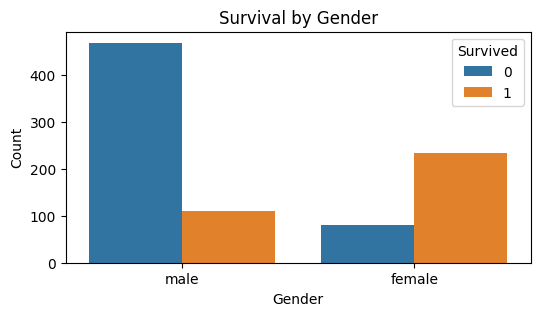

In [14]:
plt.figure(figsize=(6, 3))
sns.countplot(data=titanic_df, x="Sex", hue="Survived")
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", loc="upper right")
plt.show()

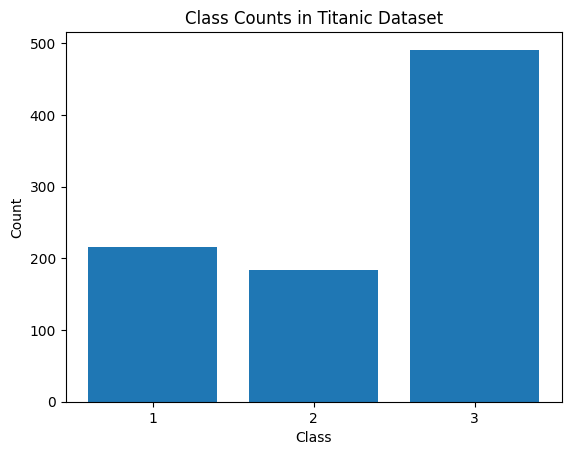

Number of first Class: 216
Number of second Class: 184
Number of third Class: 491


In [17]:
pclass_count = titanic_df["Pclass"].value_counts()

categories = ["1", "2", "3"]
values = [pclass_count[1], pclass_count[2], pclass_count[3]]

plt.bar(categories, values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Counts in Titanic Dataset')
plt.show()

print(f"Number of first Class: {values[0]}")
print(f"Number of second Class: {values[1]}")
print(f"Number of third Class: {values[2]}")

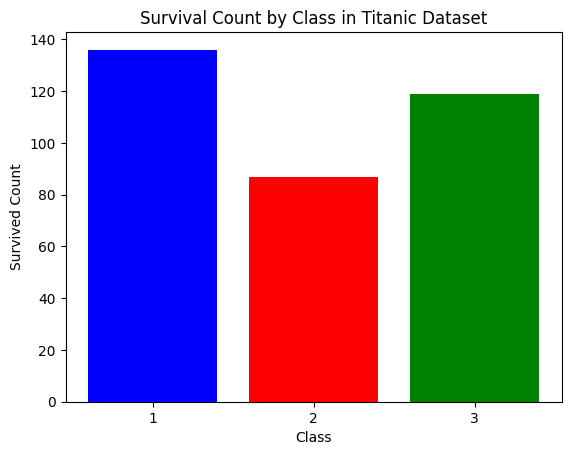

Number of Survived in first Class: 136
Number of Survived in second Class: 87
Number of Survived in third Class: 119


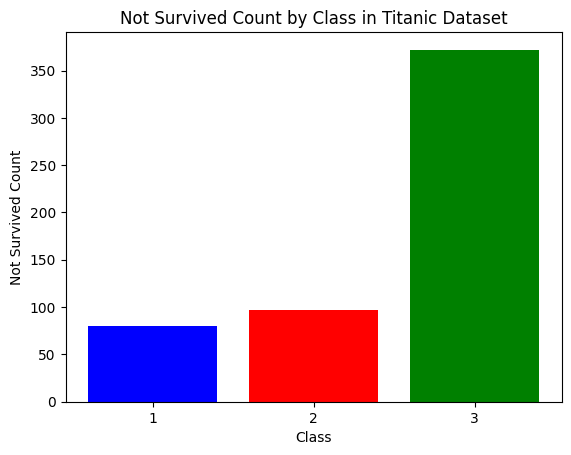

Number of Not Survived in first Class: 80
Number of Not Survived in second Class: 97
Number of Not Survived in third Class: 372


In [16]:
survived_count = titanic_df[titanic_df['Survived'] == 1]['Pclass'].value_counts()
not_survived_count = titanic_df[titanic_df['Survived'] == 0]['Pclass'].value_counts()

categories = ['1', '2', '3']
#Shows count of survivors for each passenger class, assigning a default value of 0 if there are no survivors in that class.
values = [survived_count[1], survived_count[2], survived_count[3]]

not_survived_values = [not_survived_count[1], not_survived_count[2], not_survived_count[3]]

plt.bar(categories, values, color=['blue', 'red', 'green'])
plt.xlabel('Class')
plt.ylabel('Survived Count')
plt.title('Survival Count by Class in Titanic Dataset')
plt.show()

print(f"Number of Survived in first Class: {values[0]}")
print(f"Number of Survived in second Class: {values[1]}")
print(f"Number of Survived in third Class: {values[2]}")

plt.bar(categories, not_survived_values, color=['blue', 'red', 'green'])
plt.xlabel('Class')
plt.ylabel('Not Survived Count')
plt.title('Not Survived Count by Class in Titanic Dataset')
plt.show()

print(f"Number of Not Survived in first Class: {not_survived_values[0]}")
print(f"Number of Not Survived in second Class: {not_survived_values[1]}")
print(f"Number of Not Survived in third Class: {not_survived_values[2]}")  

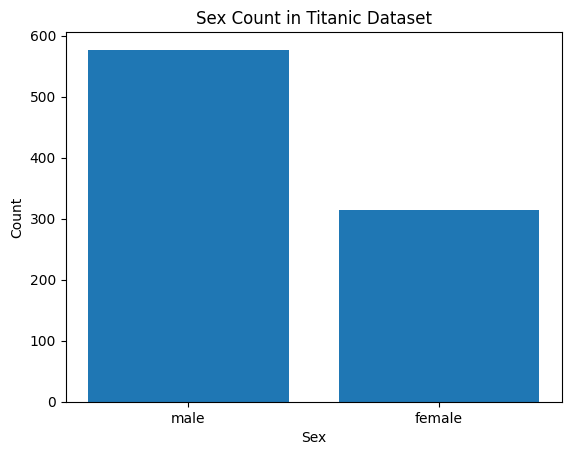

Number of Male: 577
Number of Female: 314


In [20]:
sex_count = titanic_df['Sex'].value_counts()

plt.bar(sex_count.index, sex_count.values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Count in Titanic Dataset')
plt.show()

print(f"Number of Male: {sex_count['male']}")
print(f"Number of Female: {sex_count['female']}")

Text(0.5, 1.0, 'Survival Count by Sex')

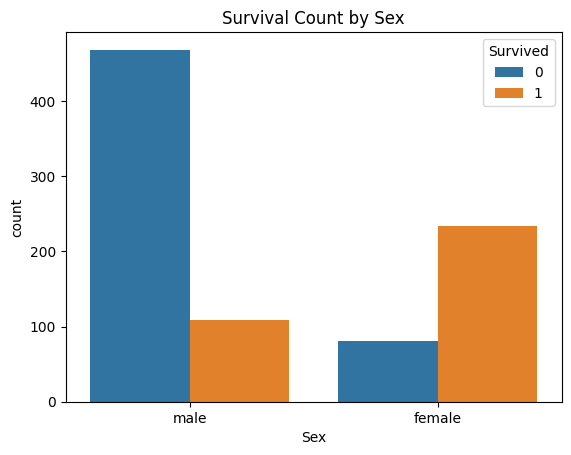

In [29]:
#  Sex by Survived
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival Count by Sex')

Text(0.5, 1.0, 'Survival Count by Pclass')

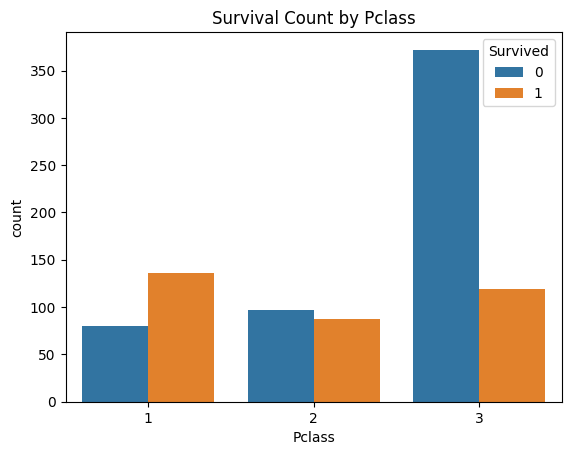

In [30]:
#  Pclass by Survived
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Survival Count by Pclass')

Text(0.5, 1.0, 'Distribution of Age')

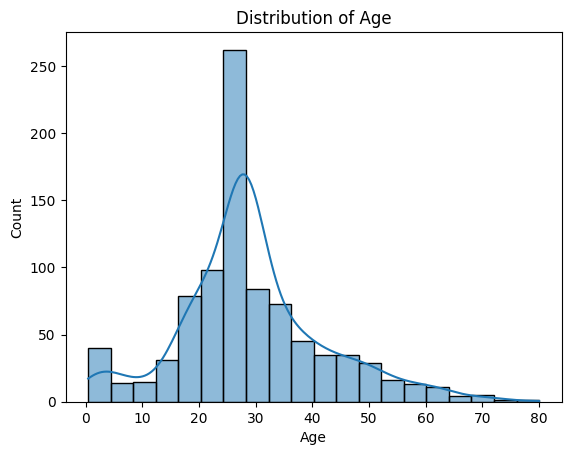

In [31]:
#  Age Distribution
sns.histplot(titanic_df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Fare Distribution by Pclass')

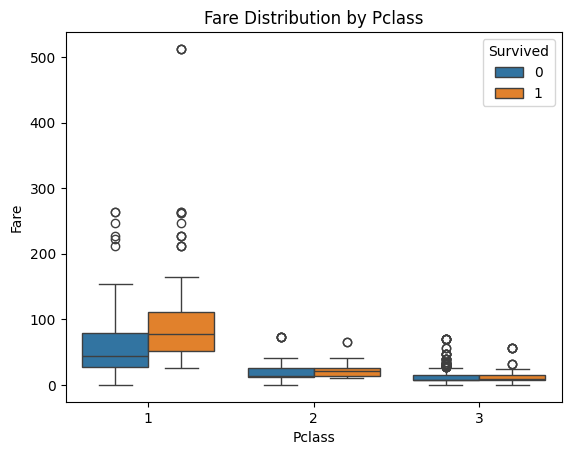

In [32]:
#  Pclass by Fare
sns.boxplot(x='Pclass', y='Fare', data=titanic_df, hue='Survived')
plt.title('Fare Distribution by Pclass')


Text(0.5, 1.0, 'Survival Rate by SibSp')

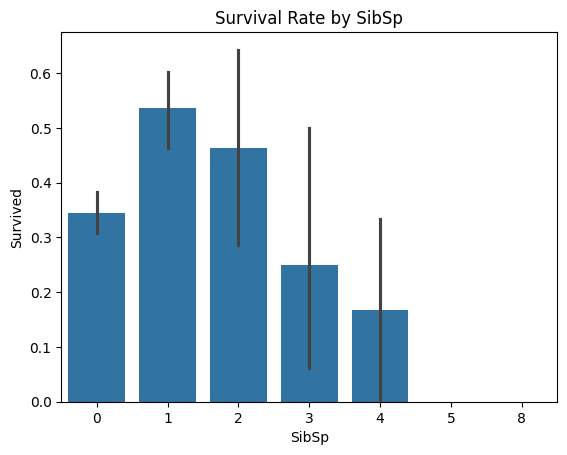

In [33]:
#  SibSp by Survived
sns.barplot(x='SibSp', y='Survived', data=titanic_df)
plt.title('Survival Rate by SibSp')

Text(0.5, 1.0, 'Survival Rate by Parch')

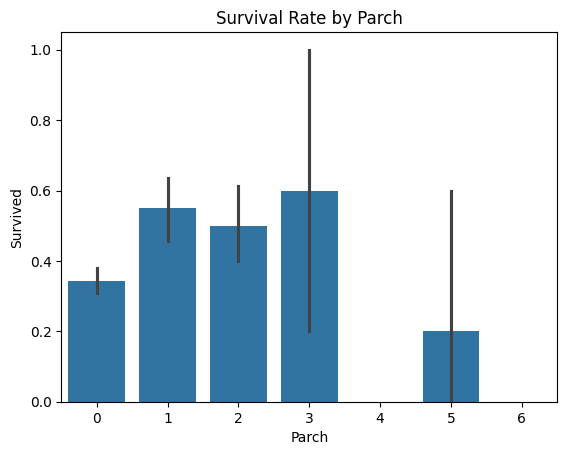

In [34]:
#  Parch by Survived
sns.barplot(x='Parch', y='Survived', data=titanic_df)
plt.title('Survival Rate by Parch')

Text(0.5, 1.0, 'Count of Passengers by Sex')

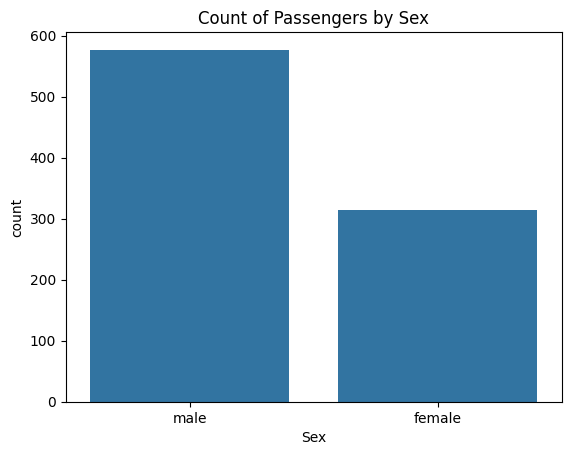

In [35]:
#  Sex
sns.countplot(x='Sex', data=titanic_df)
plt.title('Count of Passengers by Sex')

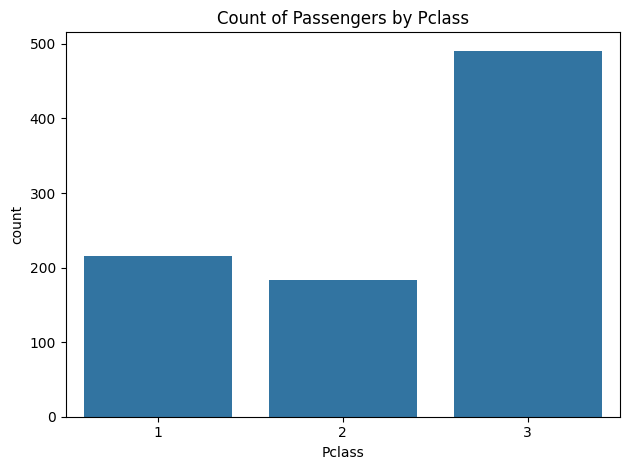

In [36]:
#  Pclass
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Count of Passengers by Pclass')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Heat Map')

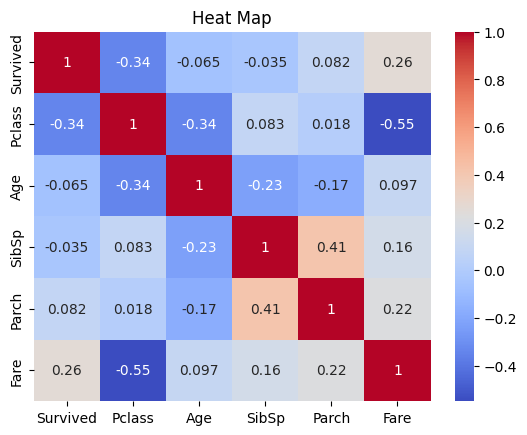

In [38]:
#  Heatmap
corr_matrix = titanic_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heat Map')

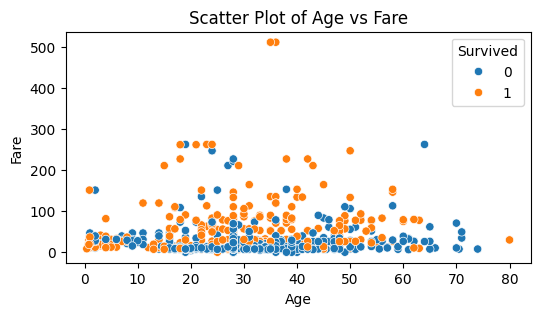

In [19]:
plt.figure(figsize=(6, 3))
sns.scatterplot(data=titanic_df, x="Age", y="Fare", hue="Survived")
plt.title("Scatter Plot of Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()